In [49]:
from xml.dom import minidom
from svg.path import parse_path
import numpy as np

In [50]:
'''
try working with SVG path objects in python
we want to export a list of coordinates to pass to the plotter
'''

'\ntry working with SVG path objects in python\nwe want to export a list of coordinates to pass to the plotter\n'

In [89]:
'''
Define an svg string
'''

svg_string = """
            <path d=
              "m 26.873821,41.161454 c 1.492076,-0.900542 37.223131,-22.973439 38.850017,-21.441451 0.700471,0.659611 -0.906767,1.699572 -1.290894,2.581722 -1.232305,2.829985 -2.225299,5.75829 -3.324133,8.642722 -4.791836,12.57855 -9.056568,25.241003 -15.290963,37.230192 -0.690489,1.327856 -3.546422,7.056104 -5.318612,7.977896 -1.21085,0.629815 0.632182,-2.693048 1.30289,-3.881731 1.419905,-2.516465 2.926829,-4.996518 4.653741,-7.313091 5.895604,-7.908689 11.850732,-15.785139 18.195549,-23.338208 2.015818,-2.399694 5.888148,-3.6078 6.648264,-6.64824 0.274064,-1.096249 -2.473729,-0.07928 -3.324132,0.664826 -2.930604,2.564265 -4.253574,6.759848 -5.983393,9.972373 -4.795676,8.906277 -9.050343,15.925004 -14.626183,24.598514 -0.797835,1.24107 -5.292759,6.278327 -5.318566,8.64272 -0.01019,0.933257 1.290957,-1.350174 1.979853,-1.979853 7.854635,-7.179448 15.276266,-14.8722 23.62042,-21.476356 13.42136,-10.622613 27.516844,-20.37371 41.581301,-30.128905 2.60832,-1.809147 5.47217,-3.971839 8.64644,-3.990781 1.24436,-0.0074 -1.00925,0.190982 -2.6433,2.643295 -1.26516,1.898704 -2.23158,3.980431 -3.32413,5.98344 -11.19069,20.516239 3.94557,-5.592227 -19.595935,28.350221 -3.034551,4.375258 -5.504154,9.116562 -8.224165,13.693999 -1.572705,2.646664 -3.111217,5.313527 -4.653741,7.977897 -0.89518,1.54623 -1.700085,3.146443 -2.659306,4.653785 -0.594878,0.934807 -1.424395,1.70915 -1.994479,2.659282 -0.114017,0.190029 0,0.886436 0,0.664827 0,-7.890111 9.404435,-16.391136 13.430059,-20.753901 1.597517,-1.731306 3.567608,-3.077882 5.318612,-4.653785 0.4659,-0.419312 1.32243,-0.70289 1.329653,-1.329653 0.01839,-1.595073 -2.971083,1.420828 -3.981207,2.65543 -1.323877,1.61808 -2.316607,3.486747 -3.324132,5.318611 -16.921316,30.765975 17.283061,-27.953797 -13.296532,21.939229 -1.200007,1.957911 -3.651567,9.79515 -6.64822,11.302 -0.196858,0.099 -0.113382,-0.4721 0,-0.66104 1.228744,-2.047516 2.412627,-4.153641 3.973735,-5.960597 4.047688,-4.685126 9.196583,-9.2113 13.961356,-13.296506 0.47027,-0.403199 -0.985954,0.788633 -1.314058,1.314056 -0.94633,1.515459 -1.636425,3.188882 -2.659306,4.653764 -4.216948,6.039149 -8.681281,11.901773 -13.044607,17.836023 -15.475569,21.04723 -9.210376,11.31545 -20.321756,29.61969 -1.34107,2.2092 -2.686765,4.41593 -3.988959,6.64827 -0.249685,0.42802 -1.015222,1.68004 -0.664827,1.32965 1.886932,-1.88693 3.310906,-4.22556 5.318612,-5.98344 23.372096,-20.46382 22.778188,-18.04086 51.584433,-36.23948 5.00586,-3.162508 9.94881,-6.423555 14.93213,-9.621463 2.43177,-1.560515 4.90891,-3.051006 7.31305,-4.653761 0.26076,-0.173845 0.35196,-0.646534 0.66482,-0.664827 0.46576,-0.02723 -0.38191,0.854236 -0.62593,1.251884 -1.61022,2.624024 -3.08756,5.327396 -4.65378,7.977918 -7.02582,11.889819 -13.45884,24.011639 -20.064348,36.121869 -3.30201,6.05376 7.917788,-11.32368 12.444568,-16.52557 8.78838,-10.09907 18.17454,-19.663284 27.40373,-29.361184 4.86901,-5.116282 9.91799,-10.058222 14.88706,-15.077384 1.65737,-1.674077 4.62659,-2.963026 4.65374,-5.318588 0.003,-0.258196 -3.89695,4.542142 -3.96562,4.630462 -2.04033,2.62427 -4.07121,5.258827 -5.98339,7.977894 -7.52794,10.704542 -25.00359,35.76004 -34.22558,50.01656 -1.40366,2.16996 -2.55536,4.49793 -3.98891,6.64826 -0.86922,1.30384 -3.32413,4.89115 -3.32413,3.32413 0,-7.56095 12.84027,-19.37712 13.60571,-20.16506 14.3794,-14.80213 29.98782,-28.359306 44.8634,-42.662702 4.19604,-4.034634 8.31512,-8.151027 12.34836,-12.348406 3.22241,-3.353551 5.96931,-6.627352 4.65374,-7.313067 -1.43403,-0.747469 -2.70343,1.352338 -3.27001,1.994455 -2.70357,3.064021 -5.40152,6.135847 -7.97792,9.30755 -2.92576,3.601794 -14.35274,18.458531 -17.37306,22.720442 -0.75203,1.06117 -3.74425,6.400454 -5.31861,7.977894 -0.15564,0.15594 -0.10945,-0.469741 0,-0.66095 0.79331,-1.38598 1.39369,-3.011138 2.65931,-3.985062 7.69334,-5.920253 15.74829,-11.380739 23.98487,-16.518416 4.08386,-2.547358 8.59847,-4.328274 12.89955,-6.488737 1.32842,-0.667279 2.62256,-1.408885 3.98896,-1.994479 0.2037,-0.0873 0.77889,-0.190042 0.66487,0 -0.73005,1.216779 -1.89197,2.130512 -2.65931,3.324132 -1.2338,1.91923 -2.21612,3.988943 -3.32418,5.983415 -6.81763,10.112377 -13.83451,20.093241 -20.45288,30.337131 -20.6372,31.94216 -40.97068,64.07954 -61.49786,96.09251 -2.36896,3.69449 -4.124071,7.77752 -6.674982,11.34879 -0.364324,0.51005 -1.549739,1.91655 -1.329653,1.32965 4.510175,-12.02714 12.728785,-15.96778 23.250515,-26.19708 10.16374,-9.88126 19.95866,-20.16443 30.57916,-29.55302 5.87236,-5.19119 12.70832,-9.18991 18.81105,-14.10822 1.00612,-0.81084 2.88896,-2.39162 1.99444,-3.32413 -1.85368,-1.9324 -4.59834,2.81164 -6.56706,4.6267 -11.79985,10.87888 -22.46253,22.93059 -33.58327,34.50279 -5.40261,5.62193 -10.77814,11.27 -16.20434,16.86917 -2.7e-4,2.6e-4 -5.38173,5.38179 -6.64822,6.64826 -0.66483,0.66482 -2.28408,2.88892 -1.99448,1.99444 0.79808,-2.46505 13.97117,-17.87846 -0.0542,-9.86393 -5.947502,3.39859 -18.311764,19.97965 -23.268878,25.92819 -0.451117,0.54134 -7.313094,8.60002 -7.313094,7.34022 0,-2.30129 0.851718,-7.51882 -0.664826,-9.94527 -6.75762,-10.81209 -27.024677,7.77632 -18.615097,-14.62613 1.573808,-4.1925 3.827532,-8.10485 6.009831,-12.01528 5.96402,-10.68682 7.092439,-13.401 12.80233,-20.25296 1.414097,-1.69694 -2.773871,3.44851 -3.97355,5.30325 -3.550893,5.48978 -6.013637,11.63869 -9.30757,17.28544 -0.651097,1.11616 -1.416595,2.16836 -1.99448,3.32413 -0.09911,0.19821 -0.156702,0.82153 0,0.66483 3.399248,-3.39925 4.732753,-8.47432 8.004355,-11.99659 2.906871,-3.1296 6.570406,-5.46687 10.004835,-8.00634 9.988947,-7.38601 4.171418,-2.73671 2.04288,1.94608 -0.70258,1.54568 -5.579412,15.51968 -0.664827,14.62613 4.283679,-0.77884 8.461407,-2.07289 12.631658,-3.32408 1.341313,-0.40244 31.230973,-10.68462 31.935303,-9.98029 1.81662,1.81662 -2.90074,6.0694 -3.98897,7.31309 -10.12667,11.57329 -14.11191,19.5899 -20.621706,33.26043 -0.426093,0.89479 -2.320718,2.6593 -1.329653,2.6593 4.515939,0 31.475109,-14.54324 35.900589,-8.64274 2.02344,2.69786 -3.6029,5.56161 -4.65379,7.31309 -2.34352,3.90586 -1.32965,8.27041 -1.32965,12.63166 0,0.15498 -0.0828,6.63792 0,6.64826 5.72588,0.71574 19.10065,-10.64322 20.57206,-11.77046 26.11977,-20.01018 3.59057,-5.90935 29.60921,-22.69555 1.91722,-1.23691 4.01261,-2.17449 5.9834,-3.32413 0.69016,-0.4026 1.21954,-1.1348 1.99443,-1.32965 0.85718,-0.21555 0.26372,1.80799 0,2.6516 -0.89934,2.8769 -1.46958,5.87324 -2.65921,8.64274 -2.19887,5.11904 -4.88118,10.01857 -7.47472,14.9494 -3.02496,5.75101 -5.80403,10.94313 -8.64279,16.62066 -1.17024,2.34047 0.80445,-2.27364 1.97468,-4.61411 1.8275,-3.655 3.07949,-4.59003 5.98339,-7.97792 6.45922,-7.53575 11.3481,-15.79323 14.62619,-25.26331 4.43648,-12.81658 -8.35156,-12.30873 -8.64279,-7.31309 -0.0196,0.33525 3.86163,-1.53522 5.90588,-5.31861 9.16982,-16.97115 14.26501,-30.57268 19.22741,-49.9104 2.08163,-8.11179 2.96663,-16.48533 4.3028,-24.75268 0.82787,-5.12228 2.84743,-13.20356 1.32966,-17.95027 -0.28052,-0.87728 -1.47694,1.17128 -1.94018,1.96735 -4.10658,7.05709 -7.60372,14.3555 -10.63722,21.93923 -0.81059,2.02647 -1.84872,3.95691 -2.65931,5.98339 -0.1646,0.41152 -0.1982,1.72608 0,1.32965 3.99886,-7.99826 -7.42149,6.0473 5.31861,-8.6427 8.31346,-9.58584 17.24668,-18.6402 25.24449,-28.49092 7.85947,-9.680323 14.96968,-19.947162 22.28242,-30.046847 0.62604,-0.864632 5.78108,-7.621834 4.65383,-9.972376 -0.006,-0.01294 -2.48221,0.45362 -5.26417,4.626541 -2.16689,3.250324 -15.92255,32.260659 -12.63175,33.90606 3.49206,1.746032 16.23025,-4.89649 17.28549,-5.318588 0.57416,-0.229664 5.44589,-3.167303 4.65374,-0.0079 -0.6752,2.692988 -4.14685,6.290694 -5.31861,8.64272 -7.75301,15.56239 -15.43974,31.79005 -20.46239,48.5166 -0.71255,2.37297 -0.94324,4.86572 -1.32965,7.31304 -0.27865,1.76481 -0.46749,3.54288 -0.66478,5.31862 -0.0245,0.22025 -0.1567,0.82153 0,0.66482 12.16952,-12.16952 -18.34228,13.94168 11.302,-11.96687 4.11926,-3.60016 8.56392,-6.81038 12.88201,-10.16946 2.19138,-1.70469 6.32194,-4.94157 6.64827,-4.65379 0.39057,0.34443 -2.57378,3.85674 -4.62652,6.59373 -5.83531,7.78042 -3.43063,5.30291 -9.97235,17.95027 -1.06838,2.06553 -9.0836,12.82843 -1.32965,11.96687 1.18845,-0.13205 6.18374,-1.69035 7.31304,-0.66482 0.62179,0.56465 -4.38809,4.92365 -4.59265,5.19639 -1.32965,1.99446 -2.65931,3.98893 -3.98896,5.98339 -0.44321,0.88644 -0.77991,1.83469 -1.32965,2.65931 -0.44322,0.66482 -2.08853,2.24455 -1.32965,1.99447 6.73657,-2.21993 12.36391,-7.91725 19.92237,-7.96296 0.30194,-0.002 -0.427,0.42704 -0.64051,0.64055 -0.67319,0.67319 -3.96409,3.96389 -3.96469,3.96465 -3.43882,4.34378 -7.08562,8.56782 -9.97235,13.29653 -3.16491,5.18437 -19.70985,34.49476 -19.70985,42.70549 0,0.10792 0.54074,-5.41329 -0.61099,-4.53737 -4.87024,3.70393 -6.91407,3.20045 -5.92968,10.58338 0.21322,1.59918 0.91395,3.09492 1.32965,4.65378 0.96531,3.61989 1.39137,9.70091 3.98139,7.97787 1.67831,-1.1165 -0.21466,-3.37679 0.66091,-4.44924 1.62837,-1.99454 11.94919,-7.85053 14.36641,-7.91573 0.18796,-0.005 -4.97486,4.79155 -3.93516,5.8758 0.29416,0.30676 0.85002,0 1.27503,0 1.10803,0 2.22961,0.17281 3.32408,0 8.96665,-1.41579 17.42911,-3.98896 26.59306,-3.98896 0.0894,0 -4.6254,2.51984 -3.21658,3.32035 1.29954,0.73841 3.78294,-0.61674 5.15232,0 1.10392,0.49718 -1.7122,1.71222 -2.56831,2.56832 -1.48635,1.48632 -3.26478,3.26482 -4.65374,4.65378 -1.45307,1.45307 2.22369,0.66483 3.22322,0.66483 0.53515,0 -3.7601,-0.63477 -3.7601,0.58671 0,3.42293 0.16081,-0.7183 -3.77478,4.98537 -0.44758,0.64868 -1.18889,13.75884 -0.66478,14.50854 0.56004,0.8011 3.04697,-0.54436 3.52885,-0.66482 0.64496,-0.16124 1.35521,0.18264 1.99444,0 2.5785,-0.73673 8.44119,-4.45632 11.24765,-2.632 0.5457,0.35476 0,7.00897 0,7.64419" /> """

N_steps = 1000  # define resolution of path

In [90]:
from xml.dom import minidom
from svg.path import parse_path

svg_dom = minidom.parseString(svg_string)

path_strings = [path.getAttribute('d') for path in svg_dom.getElementsByTagName('path')]

for path_string in path_strings:
    path_data = parse_path(path_string)

    #  now use methods provided by the path_data object
    #  e.g. points can be extracted using 
    #  point = path_data.pos(pos_val) 
    #  where pos_val is anything between 0 and 1


In [91]:
polygon = []

X_RESCALE = 274
Y_RESCALE = 286

steps = np.linspace(0, 1.0, N_steps)
for i, step in enumerate(steps):
    
    complex_notation = path_data.point(step)   
    x = np.real(complex_notation) / X_RESCALE
    y = np.imag(complex_notation) / Y_RESCALE
    
    #print(complex_notation)
    #print(x,y)
    #print()
    
    polygon.append((x,y))

0.9997220848825777
0.9980245454545451


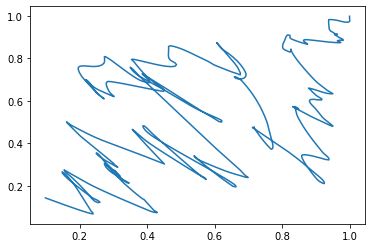

In [92]:
'''
sanity check
'''

import matplotlib.pyplot as plt


xx = [p[0] for p in polygon]
yy = [p[1] for p in polygon]

print(max(xx))
print(max(yy))

plt.plot(xx,yy)

In [93]:
print(polygon)

[(0.09807963868613138, 0.14392116783216782), (0.10064964962668699, 0.14241608349632193), (0.10596722462025554, 0.13929769223878782), (0.11362358332464484, 0.13482258237418915), (0.1232099453976625, 0.12924734221714948), (0.1343175304971163, 0.1228285600822923), (0.1465375582808139, 0.11582282428424133), (0.15946124840656303, 0.1084867231376201), (0.1726798205321714, 0.10107684495705226), (0.18578449431544675, 0.0938497780571613), (0.19836648941419666, 0.08706211075257084), (0.21001702548622891, 0.0809704313579045), (0.22032732218935125, 0.07583132818778582), (0.22888859918137136, 0.07190138955683843), (0.23529207612009687, 0.0694372037796859), (0.23912897266333563, 0.06869535917095182), (0.23861675411793362, 0.07361627288556048), (0.23306166928495534, 0.08274780785321685), (0.22924042641833084, 0.09216482091948425), (0.22558216503937964, 0.10164560965560442), (0.2218685060749809, 0.11111266265741446), (0.2181441366931223, 0.12058614030598724), (0.21445278213274238, 0.13006100518499658)